# 🧭 Análise Exploratória de Dados (EDA) — PNADC Visita 1

Este notebook tem como objetivo realizar uma **análise exploratória de dados (EDA)** a partir dos **microdados da PNADC (Pesquisa Nacional por Amostra de Domicílios Contínua)** referentes à **Visita 1**, disponibilizados pelo **IBGE**.

A EDA visa compreender a estrutura e a qualidade dos dados, identificar padrões e possíveis inconsistências antes de análises mais aprofundadas.

> 📘 **Fonte dos dados:** IBGE — PNADC Microdados (Visita 1)  
> 📅 **Ano analisado:** 2024

## 🧩 1. Importações

Nesta seção são carregadas as bibliotecas necessárias para leitura, manipulação e visualização dos dados.


```python
# Importações básicas de sistema
import sys        # Permite manipulação do interpretador Python e do caminho de módulos
import os         # Fornece funções para interagir com o sistema operacional

# Bibliotecas para análise de dados
import pandas as pd    # Estruturas de dados e análise de tabelas (DataFrame)
import numpy as np     # Operações numéricas e matemáticas eficientes

# Bibliotecas para visualização
import matplotlib.pyplot as plt  # Criação de gráficos e figuras
import seaborn as sns            # Visualizações estatísticas mais avançadas, construídas sobre matplotlib

# Adiciona o caminho absoluto da pasta 'src' para que possamos importar módulos personalizados
sys.path.append(os.path.abspath("../src"))

# Importação de funções específicas do módulo 'process_data'
# Essas funções são utilizadas para leitura e limpeza de dados da PNADC
from process_data import (
    generate_pnadc_csv,             # Gera arquivos CSV a partir de dados brutos
    read_pnadc_csv,                 # Lê arquivos CSV da PNADC em DataFrames
    get_missing_values_percentage,  # Calcula o percentual de valores faltantes
    get_variables_for_nao_aplicavel,# Identifica variáveis com valores "não aplicável"
    fill_nao_aplicavel_with_zero,   # Substitui valores "não aplicável" por zero
)
```

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("../src"))

from process_data import (
    generate_pnadc_csv,
    read_pnadc_csv,
    get_missing_values_percentage,
    get_variables_for_nao_aplicavel,
    fill_nao_aplicavel_with_zero,
)

## 🧹 2. Limpeza de Dados

A limpeza de dados é uma etapa essencial da análise, onde ajustamos, corrigimos e preparamos os dados brutos para garantir que estejam consistentes e prontos para análise.  

Isso inclui, de forma geral:

- Remover ou tratar valores ausentes.  
- Corrigir inconsistências nos dados (como formatos diferentes ou erros de digitação).  
- Remover redundâncias ou valores inúteis.

O objetivo é garantir que os dados estejam confiáveis e estruturados de maneira adequada para análises e visualizações posteriores.


### Processamento Inicial

O conjunto de dados da PNADC contém diversas variáveis de controle, identificadas pelos códigos `V1032XXX`.  

Essas variáveis são utilizadas para **estimativas mais precisas de variâncias e erros amostrais** em pesquisas complexas, representando diferentes versões do peso de domicílios ou indivíduos.

Para este trabalho, **não utilizaremos essas variáveis individuais**, pois já existe a **variável geral (`V1032`)**, que é suficiente para análises agregadas. Isso reduz consideravelmente o tamanho do arquivo e simplifica o processamento.

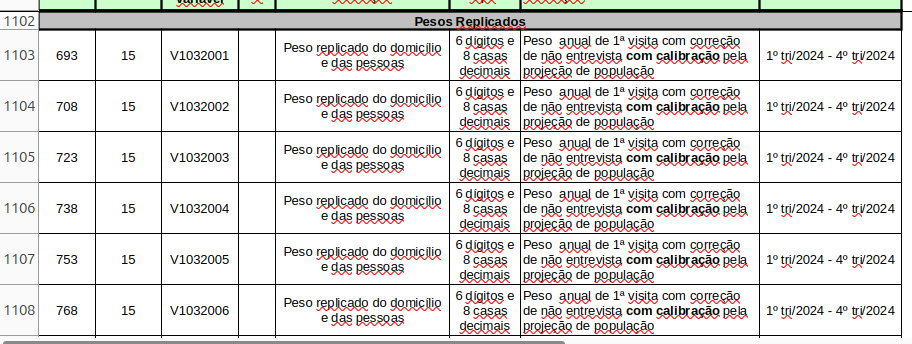


In [2]:
generate_pnadc_csv()


=== Processando PNADC 2024 Visita 1 ===
Arquivo ../data/processed/PNADC_2024_visita1.csv criado com sucesso!


In [3]:
df = read_pnadc_csv()

### Verificação de Valores Vazios

Antes de realizar qualquer análise, é importante identificar **quais colunas possuem valores ausentes** e a **proporção desses valores** no conjunto de dados.  

Valores ausentes podem impactar a precisão de estatísticas descritivas e modelos preditivos, então sua identificação é o primeiro passo no **processamento de dados**.

Para este trabalho, vamos **analisar o número de NaNs por coluna** e decidir estratégias de tratamento (remoção ou imputação) conforme a necessidade.

In [4]:
missing_df = get_missing_values_percentage(df)

In [5]:
missing_df

,coluna,pct_vazios
0,V405121,100.00
1,V40502,100.00
2,V405922,100.00
3,V40582,100.00
4,V405821,100.00
...,...,...
206,VD5008,0.03
207,VD5009,0.03
208,VD5010,0.03
209,VD5011,0.03


### Verificação de Valores Vazios

Ao analisar o conjunto de dados, **verificamos que algumas colunas estão totalmente vazias**.  

Essas colunas podem ser **excluídas sem perda de informação relevante**, pois não há dados que possam ser substituídos ou utilizados de outra forma. Estratégias comuns, como preencher com média, mediana ou remover linhas, **não são aplicáveis** quando todos os valores são NaN.

In [6]:
cols_to_drop = missing_df.loc[missing_df['pct_vazios'] == 100, 'coluna'].tolist()

In [7]:
df = df.drop(columns=cols_to_drop)

In [8]:
print(f"Colunas removidas ({len(cols_to_drop)}): {cols_to_drop}")

Colunas removidas (17): ['V405121', 'V40502', 'V405922', 'V40582', 'V405821', 'V405822', 'V40583', 'V40584', 'V405831', 'V405921', 'V40592', 'V405022', 'V40503', 'V405031', 'V40512', 'V405122', 'V405021']


### Atualização do DataFrame de Valores Vazios

Após identificar e remover **as colunas totalmente vazias** do DataFrame principal, é importante **atualizar também o `missing_df`** para manter a consistência.

Dessa forma, podemos **verificar novamente quais colunas restantes ainda possuem valores ausentes** e planejar estratégias de tratamento, garantindo que apenas as variáveis com dados úteis sejam consideradas nas análises.

> Remover essas colunas vazias do `missing_df` ajuda a **simplificar a visualização** e o acompanhamento das colunas que realmente contêm informação.


In [9]:
missing_df = missing_df[~missing_df['coluna'].isin(cols_to_drop)].reset_index(drop=True)

In [10]:
missing_df

,coluna,pct_vazios
0,V401512,99.99
1,V40082,99.99
2,V4075A1,99.99
3,V40083,99.97
4,V3013B,99.96
...,...,...
189,VD5008,0.03
190,VD5009,0.03
191,VD5010,0.03
192,VD5011,0.03


### Identificação de Variáveis com "Não Aplicável"

Para garantir um tratamento correto dos dados, é importante **identificar as variáveis que contêm valores "Não aplicável"**.  

Essa análise permite:

- Listar todas as variáveis que possuem pelo menos um valor marcado como "Não aplicável".  
- Planejar o tratamento adequado desses casos, mantendo a **semântica correta dos dados**.  
- Evitar substituições automáticas que possam alterar o significado de respostas que não se aplicam ao entrevistado.  

> O resultado será uma **lista com os nomes ou códigos das variáveis** que contêm valores "Não aplicável", pronta para inspeção ou tratamento posterior.


In [11]:
file_path = "../data/raw/dicionario_PNADC_microdados_2024_visita1_20250822.xls"
variables_with_nao_aplicavel = get_variables_for_nao_aplicavel(file_path)

### Tratamento de Valores "Não Aplicável"

Após a identificação das colunas que contêm valores "Não aplicável", podemos **preencher os valores nulos dessas colunas com 0**.  

Essa substituição faz sentido porque, semanticamente, **"Não aplicável" pode ser entendido como um valor nulo**, equivalente a 0 para efeitos de análise.  

Além disso, a **maioria esmagadora dessas colunas é categórica**, o que torna estratégias como preencher com média ou mediana **menos precisas ou adequadas**. Substituir por 0 garante consistência e mantém a interpretação correta dos dados, sem introduzir viés indevido.  

> O resultado é um DataFrame pronto para análises quantitativas, com valores "Não aplicável" tratados de forma consistente.


In [12]:
df = fill_nao_aplicavel_with_zero(df, variables_with_nao_aplicavel)

### Atualização do DataFrame de Valores Vazios

Após identificar as colunas que continham valores "Não aplicável" e **preencher seus valores nulos com 0**, é importante **atualizar também o `missing_df`** para manter a consistência.

Dessa forma, podemos **verificar novamente quais colunas restantes ainda possuem valores ausentes** e planejar estratégias de tratamento, garantindo que apenas as variáveis com dados úteis sejam consideradas nas análises.

> Remover as colunas que já foram preenchidas do `missing_df` ajuda a **simplificar a visualização** e o acompanhamento das colunas que realmente precisam de atenção.


In [13]:
missing_df = missing_df[~missing_df['coluna'].isin(variables_with_nao_aplicavel)].reset_index(drop=True)

In [14]:
missing_df

,coluna,pct_vazios
0,Capital,76.83
1,RM_RIDE,69.06
2,S01020,27.96


### Atualização do DataFrame de Valores Vazios

Após identificar as colunas que continham valores "Não aplicável" e **preencher seus valores nulos com 0**, o `missing_df` foi atualizado para refletir essa modificação.

Depois dessa atualização, **restaram apenas três colunas com valores ausentes** no DataFrame.  
Essas variáveis serão **analisadas individualmente**, a fim de compreender a origem e o significado dos valores faltantes e definir a melhor estratégia de tratamento para cada caso.


In [15]:
df.loc[df["Capital"].notna(), ["UF", "Capital"]].drop_duplicates()


,UF,Capital
0,11,11.0
5949,12,12.0
13470,13,13.0
24239,14,14.0
29019,15,15.0
42803,16,16.0
46675,17,17.0
52187,21,21.0
77057,22,22.0
86054,23,23.0


### Padronização da Variável "Capital"

Conforme verificado na inspeção anterior, os dados da coluna **"Capital"** se mostraram **redundantes em relação à variável de Estado (UF)**.  

Por exemplo, se o estado é *Minas Gerais (MG)*, a capital associada será sempre *Belo Horizonte (BH)*. Assim, não há possibilidade de uma combinação válida onde a UF seja *MG* e a capital seja diferente de *BH*.  

Dessa forma, a variável **"Capital"** pode ser reinterpretada de maneira mais simples e informativa como uma **variável binária**:

- `1` → Indica que o domicílio pertence à capital do estado.  
- `0` → Indica que o domicílio pertence ao interior (ou seja, não é capital).

Todos os valores nulos serão substituídos por `0`, e todos os valores não nulos serão convertidos para `1`.  

> Essa transformação mantém a informação essencial da variável, elimina redundâncias e facilita análises que envolvem diferenças entre capitais e interiores.


In [16]:
df["Capital"] = df["Capital"].notna().astype(int)

In [17]:
df["Capital"].value_counts()

Capital
0    293354
1     88461
Name: count, dtype: int64

In [18]:
df.loc[df["RM_RIDE"].notna(), ["UF", "RM_RIDE"]].drop_duplicates()

,UF,RM_RIDE
13470,13,13.0
29019,15,15.0
42803,16,16.0
52159,21,22.0
52187,21,21.0
76848,22,22.0
86054,23,23.0
103569,24,24.0
111179,25,25.0
121752,26,26.0


In [19]:
df[(df["UF"] == 21) & (df["RM_RIDE"] == 22)].shape[0]

516

### Padronização da Variável "RM_RIDE"

O comportamento da coluna **`RM_RIDE`** foi **quase igual ao observado em `Capital`**, com a maioria das regiões coincidindo com a capital do respectivo estado.  

No entanto, foi identificado um caso específico:  
- **UF = 21 (Maranhão)** e **RM_RIDE = 22 → Região Administrativa Integrada de Desenvolvimento da Grande Teresina (PI)**.  

Pesquisando, verificou-se que essa região também abrange parte do **leste do Maranhão**, como mostrado na imagem abaixo. Esse é o motivo pelo qual surgiu essa aparente inconsistência.  

Para contornar esse tipo de situação e manter a informação de forma consistente, propõe-se transformar a variável em **três categorias**:

- `0` → Não faz parte da região metropolitana.  
- `1` → Faz parte da região metropolitana do seu estado.  
- `2` → Faz parte da região metropolitana de outro estado.  

> Essa padronização preserva a informação original, elimina ambiguidades e facilita análises comparativas entre regiões metropolitanas e áreas do interior.

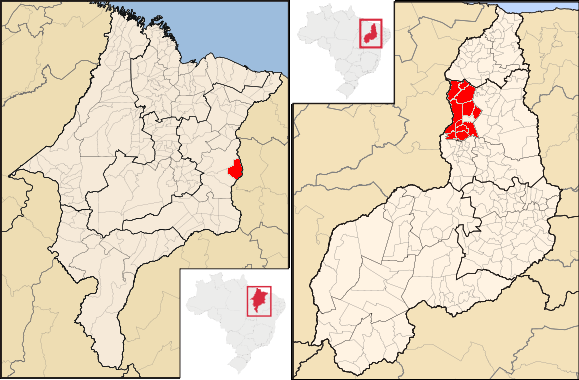


In [20]:
df["RM_RIDE"] = df.apply(lambda x: 0 if pd.isna(x["RM_RIDE"]) else 1 if x["RM_RIDE"] == x["UF"] else 2, axis=1)

In [21]:
df["RM_RIDE"].value_counts()

RM_RIDE
0    263689
1    117610
2       516
Name: count, dtype: int64

### Padronização da Variável "S01020"

A variável **S01020** refere-se à pergunta **"O terreno onde está localizado este domicílio é próprio?"**.  

Durante a inspeção dos dados, observou-se que essa variável apresenta **valores nulos**, possivelmente porque os respondentes **não sabem ou não têm certeza se o terreno é próprio**, especialmente em **cidades do interior**, onde é comum que as residências não possuam documentação formal do terreno ou informações precisas sobre a propriedade.  

Para simplificar a análise e reduzir inconsistências, a variável **S01020** será padronizada com a seguinte codificação:

- `1` → O terreno do domicílio é próprio.  
- `2` → O terreno do domicílio **não é próprio**.  
- `0` → Informação **desconhecida ou não informada** (valores nulos serão preenchidos com `0`).

> Essa transformação mantém a informação essencial da variável, trata de forma explícita os dados ausentes e facilita análises comparativas entre domicílios em terrenos próprios, não próprios ou com informação desconhecida.


In [22]:
df["S01020"] = df["S01020"].fillna(0)

In [23]:
df.isnull().any().any()

np.False_

### Remoção do DataFrame `missing_df`

Como **não há mais valores nulos** no DataFrame principal, o DataFrame **`missing_df`** se tornou desnecessário.  

Portanto, podemos **deletá-lo da memória** para liberar espaço e simplificar o ambiente de trabalho.


In [24]:
del missing_df

### Identificação de Colunas com Valor Único

Algumas colunas do DataFrame podem apresentar **apenas um valor único** em todas as linhas.  

Essas colunas são geralmente **inúteis para análises**, pois não fornecem variabilidade nem informação discriminante entre os registros.  

Para identificar essas colunas, verificamos o número de valores únicos em cada coluna e listamos aquelas que possuem apenas **um valor**.  

> Colunas identificadas como tendo valor único podem ser **consideradas para exclusão**, simplificando o DataFrame e otimizando análises futuras.


In [25]:
unique_columns = df.columns[df.nunique() == 1].tolist()

In [26]:
unique_columns

['Ano']

In [27]:
df = df.drop(columns=unique_columns)

### Finalização do Processamento

O **DataFrame principal (`df`)** está **processado na parte inicial** do fluxo de limpeza.  

As últimas etapas dessa fase são:

1. **Salvar o DataFrame em CSV** no diretório `../data/processed/dados_limpos.csv`, garantindo que os dados processados fiquem armazenados para futuras análises.  
2. **Remover o DataFrame da memória principal**, liberando espaço e mantendo o ambiente de trabalho limpo.


In [28]:
df.to_csv("../data/processed/dados_limpos.csv", index=False)
del df

## 📊 3. Análise Exploratória de Dados

A análise exploratória de dados (EDA) é a etapa onde **investigamos padrões, tendências e características principais** do conjunto de dados limpo.  

O objetivo é **compreender melhor os dados** antes de análises mais complexas ou modelagem, identificando relações e possíveis insights.  

Nesta etapa, a análise será **focada em desigualdades por raça**, examinando diferenças em indicadores socioeconômicos, educacionais e habitacionais entre os grupos raciais.


### Início da Análise Exploratória de Dados

Nesta etapa, daremos início à **análise exploratória de dados (EDA)**, que tem como objetivo compreender melhor a estrutura, distribuição e padrões presentes no conjunto de dados após as etapas de limpeza e padronização.  

O primeiro passo consiste em **carregar o conjunto de dados já tratado**, garantindo que todas as transformações realizadas anteriormente estejam refletidas na base utilizada para a análise.  

> A partir daqui, será possível explorar variáveis, detectar tendências, e identificar possíveis relações ou desigualdades entre grupos populacionais.


In [29]:
df = pd.read_csv("../data/processed/dados_limpos.csv")

### Análise por Raça

Nesta primeira frente da análise exploratória, o foco será a **distribuição e desigualdade entre grupos raciais**.  

A análise por raça é essencial para compreender **como características socioeconômicas e de acesso** variam entre diferentes grupos da população.  

Serão explorados aspectos como:  
- Proporção de indivíduos por grupo racial;  
- Diferenças em indicadores de renda, educação e ocupação;  
- Padrões de desigualdade e possíveis disparidades entre grupos.

| Código | Raça/Cor |
|--------|-----------|
| 1      | Branca |
| 2      | Preta |
| 3      | Amarela |
| 4      | Parda |
| 5      | Indígena |

> Essa etapa fornece uma base sólida para entender como a variável raça influencia outras dimensões sociais e econômicas dentro do conjunto de dados.


### Filtragem de Raças Conhecidas

Para garantir a **consistência da análise**, todos os registros com raça **desconhecida ou ignorada** foram removidos do conjunto de dados.  

> Dessa forma, as análises subsequentes consideram apenas os grupos raciais claramente identificados: **Brancos, Pretos, Pardos, Amarelos e Indígenas**, evitando distorções causadas por categorias não informadas.


In [30]:
df_raca_known = df[df["V2010"].isin([1, 2, 3, 4, 5])].copy()

### 3.1 Rendimento

Para esta análise, serão utilizadas três variáveis principais:

- **V2010** → identifica a **raça ou cor** do indivíduo;  
- **V1032** → representa o **peso amostral**, necessário para ponderar os resultados conforme o desenho da amostra;  
- **Rendimento total** → calculado como a **soma dos rendimentos habituais** recebidos em **dinheiro e produtos**, a partir das seguintes variáveis:
  - `V403312`, `V403322`
  - `V405012`, `V405022`
  - `V405812`, `V405822`

Vamos considerar apenas aqueles com rendimento total maior que 0, para considerar a renda daqueles que trabalham e evitar presença de muitos valores 0 que poderiam arrastar a média.

Essas colunas serão consolidadas em um novo DataFrame contendo apenas as três variáveis de interesse: **raça**, **peso** e **rendimento total**.

In [31]:
df_raca = df_raca_known.loc[:, [
    "V2010", "V1032",
    "V403312", "V403322",
    "V405012", "V405812"
]].copy()

df_raca["rendimento_total"] = df_raca[[
    "V403312", "V403322", "V405012", "V405812"
]].sum(axis=1, skipna=False)

raca_map = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
}

df_raca["V2010_cat"] = df_raca["V2010"].map(raca_map)

df_raca_empregados = df_raca.loc[df_raca["rendimento_total"] > 0, ["V2010_cat", "V1032", "rendimento_total"]].copy()

df_raca_empregados.head()


,V2010_cat,V1032,rendimento_total
1,Parda,222.110627,1600.0
3,Parda,258.180088,1600.0
5,Parda,204.806479,3500.0
6,Parda,204.806479,1600.0
18,Parda,443.356466,2500.0


### Renda Média Ponderada por Raça

Para refletir a realidade populacional representada pela amostra, a **renda média de cada grupo racial** foi calculada utilizando **pesos amostrais**.  

Dessa forma, cada indivíduo contribui para a média proporcionalmente ao **número de pessoas que representa na população**.  

> Essa abordagem permite observar de forma mais precisa as disparidades de rendimento entre os diferentes grupos raciais, garantindo que as conclusões sejam **representativas da população** e não apenas da amostra coletada.


In [32]:
renda_media_raca = df_raca_empregados.groupby("V2010_cat").agg(
    renda_media_ponderada = ("rendimento_total", lambda x: np.average(x, weights=df_raca_empregados.loc[x.index, "V1032"]))
)

renda_media_raca

,renda_media_ponderada
V2010_cat,
Amarela,4759.225857
Branca,4121.110426
Indígena,2477.209807
Parda,2491.480453
Preta,2458.642278


### Boxplot do Rendimento por Raça

Para explorar a distribuição do **rendimento total por raça**, geramos um **boxplot ponderado pelos pesos amostrais**, garantindo que cada observação represente corretamente a população que ela simboliza.

> Como os pesos da amostra indicam quantas pessoas cada linha representa, replicamos as observações proporcionalmente para que o gráfico reflita a população real.

Além disso, **os outliers foram retirados da visualização** (`showfliers=False`) para facilitar a interpretação:

- Os valores extremos de rendimento podem distorcer a escala do boxplot.
- Ao omitir os outliers, conseguimos **comparar a dispersão e a mediana dos rendimentos por raça** de forma mais clara, sem perder a essência da distribuição da maioria da população.

> O resultado permite identificar diferenças na distribuição de rendimentos entre grupos raciais de forma visual e ponderada, mantendo a clareza da apresentação.


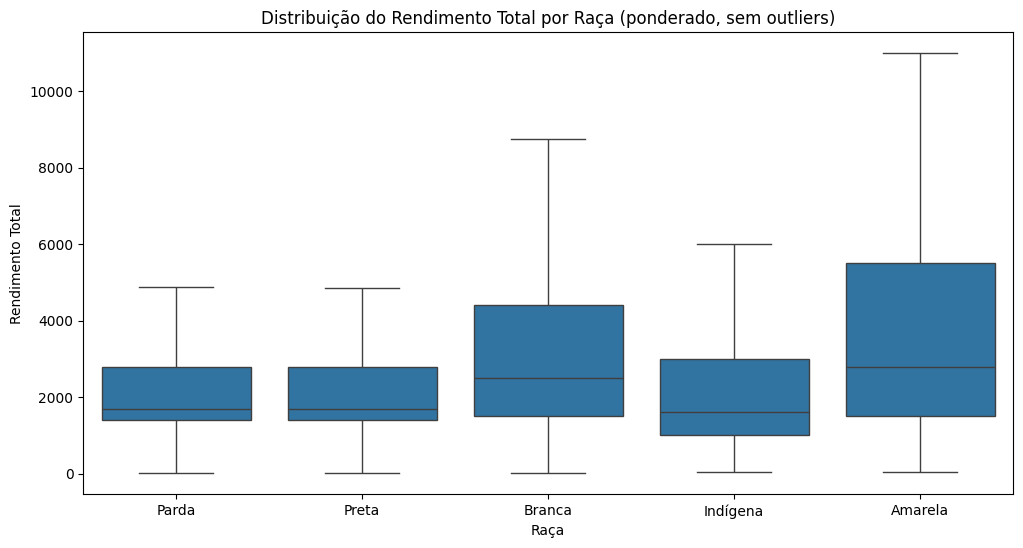

In [33]:
os.makedirs("../reports/figures", exist_ok=True)

df_plot = df_raca_empregados.copy()
df_plot["peso_normalizado"] = np.round(df_plot["V1032"] / df_plot["V1032"].min()).astype(int)
df_plot_expanded = df_plot.loc[df_plot.index.repeat(df_plot["peso_normalizado"])]

plt.figure(figsize=(12, 6))
sns.boxplot(x="V2010_cat", y="rendimento_total", data=df_plot_expanded, showfliers=False)

plt.title("Distribuição do Rendimento Total por Raça (ponderado, sem outliers)")
plt.xlabel("Raça")
plt.ylabel("Rendimento Total")

plt.savefig("../reports/figures/raca_rendimento.png", dpi=300, bbox_inches='tight')
plt.show()


### Análise do Boxplot de Rendimento por Raça

Observa-se claramente que as raças **Parda** e **Preta** apresentam valores semelhantes, consideravelmente mais baixos que os grupos **Brancos** e **Amarelos**, com mediana próxima à dos **Indígenas**, embora o boxplot dos Indígenas apresente uma amplitude maior.

Entre **Brancos** e **Amarelos**, a mediana é similar, mas a amplitude dos **Amarelos** é consideravelmente maior, atingindo valores superiores a 10.000, enquanto o topo do boxplot dos **Brancos** está em aproximadamente 9.000.

Além disso, ao considerar a **mediana ponderada pelo peso amostral**, verifica-se que os grupos **Negros, Indígenas e Pardos** possuem mediana abaixo de 2.000, enquanto os grupos **Brancos** e **Amarelos** possuem mediana próxima a 2.500, evidenciando a desigualdade de rendimento entre os grupos raciais.


### 3.2 Escolaridade

Para esta análise, serão utilizadas três variáveis principais:

- **V2010** → identifica a **raça ou cor** do indivíduo;  
- **V1032** → representa o **peso amostral**, necessário para ponderar os resultados conforme o desenho da amostra;  
- **V3009A** → indica o **grau de escolaridade mais alto** alcançado pelo indivíduo, com os seguintes códigos:

| Código | Escolaridade |
|--------|-------------|
| 01     | Creche |
| 02     | Pré-escola |
| 03     | Classe de alfabetização - CA |
| 05     | Antigo primário (elementar) |
| 06     | Antigo ginásio (médio 1º ciclo) |
| 07     | Regular do ensino fundamental ou do 1º grau |
| 08     | Educação de jovens e adultos (EJA) ou supletivo do 1º grau |
| 09     | Antigo científico, clássico, etc. (médio 2º ciclo) |
| 10     | Regular do ensino médio ou do 2º grau |
| 11     | Educação de jovens e adultos (EJA) ou supletivo do 2º grau |
| 12     | Superior - graduação |
| 13     | Especialização de nível superior |
| 14     | Mestrado |
| 15     | Doutorado |
| —      | Não aplicável |

Vamos considerar apenas indivíduos com **escolaridade aplicável** (não nula ou “Não aplicável”), criando um DataFrame contendo apenas **raça**, **peso** e **grau de escolaridade mais alto**.  

Essa consolidação permitirá análises de **distribuição e rendimento por nível de escolaridade**, ponderadas pelos pesos amostrais.


In [34]:
df_escolaridade = df_raca_known.loc[:, ["V2010", "V1032", "V3009A"]].copy()
df_escolaridade = df_escolaridade[df_escolaridade["V3009A"].notna() & (df_escolaridade["V3009A"] != "Não aplicável")]

raca_map = {1: "Branca", 2: "Preta", 3: "Amarela", 4: "Parda", 5: "Indígena", 9: "Ignorado"}
df_escolaridade["V2010_cat"] = df_escolaridade["V2010"].map(raca_map)

escola_map = {
    1: "Creche", 2: "Pré-escola", 3: "Classe de alfabetização - CA", 5: "Antigo primário (elementar)",
    6: "Antigo ginásio (médio 1º ciclo)", 7: "Regular do ensino fundamental ou do 1º grau",
    8: "Educação de jovens e adultos (EJA) ou supletivo do 1º grau", 9: "Antigo científico, clássico, etc. (médio 2º ciclo)",
    10: "Regular do ensino médio ou do 2º grau", 11: "Educação de jovens e adultos (EJA) ou supletivo do 2º grau",
    12: "Superior - graduação", 13: "Especialização de nível superior", 14: "Mestrado", 15: "Doutorado"
}
df_escolaridade["V3009A_cat"] = df_escolaridade["V3009A"].map(escola_map)

df_escolaridade = df_escolaridade[["V2010_cat", "V1032", "V3009A_cat"]]

df_escolaridade.head()


,V2010_cat,V1032,V3009A_cat
0,Parda,148.334313,Antigo primário (elementar)
1,Parda,222.110627,Regular do ensino médio ou do 2º grau
2,Parda,222.110627,Regular do ensino médio ou do 2º grau
3,Parda,258.180088,Regular do ensino médio ou do 2º grau
4,Parda,258.180088,Regular do ensino médio ou do 2º grau


### Heatmap da Escolaridade por Raça

Para visualizar as diferenças educacionais entre raças, será gerado um **heatmap ponderado pelos pesos amostrais**.

- Cada célula do heatmap representa o **percentual ponderado de indivíduos** daquela raça em cada nível de escolaridade;  
- A ponderação é feita utilizando a coluna de **peso amostral**, garantindo que a distribuição reflita corretamente a população;  
- Essa visualização permite identificar **concentrações e desigualdades educacionais** de forma clara, comparando rapidamente os diferentes grupos raciais.

> O heatmap ajuda a evidenciar quais raças estão mais concentradas em determinados níveis de escolaridade e a observar padrões gerais de distribuição educacional na população.


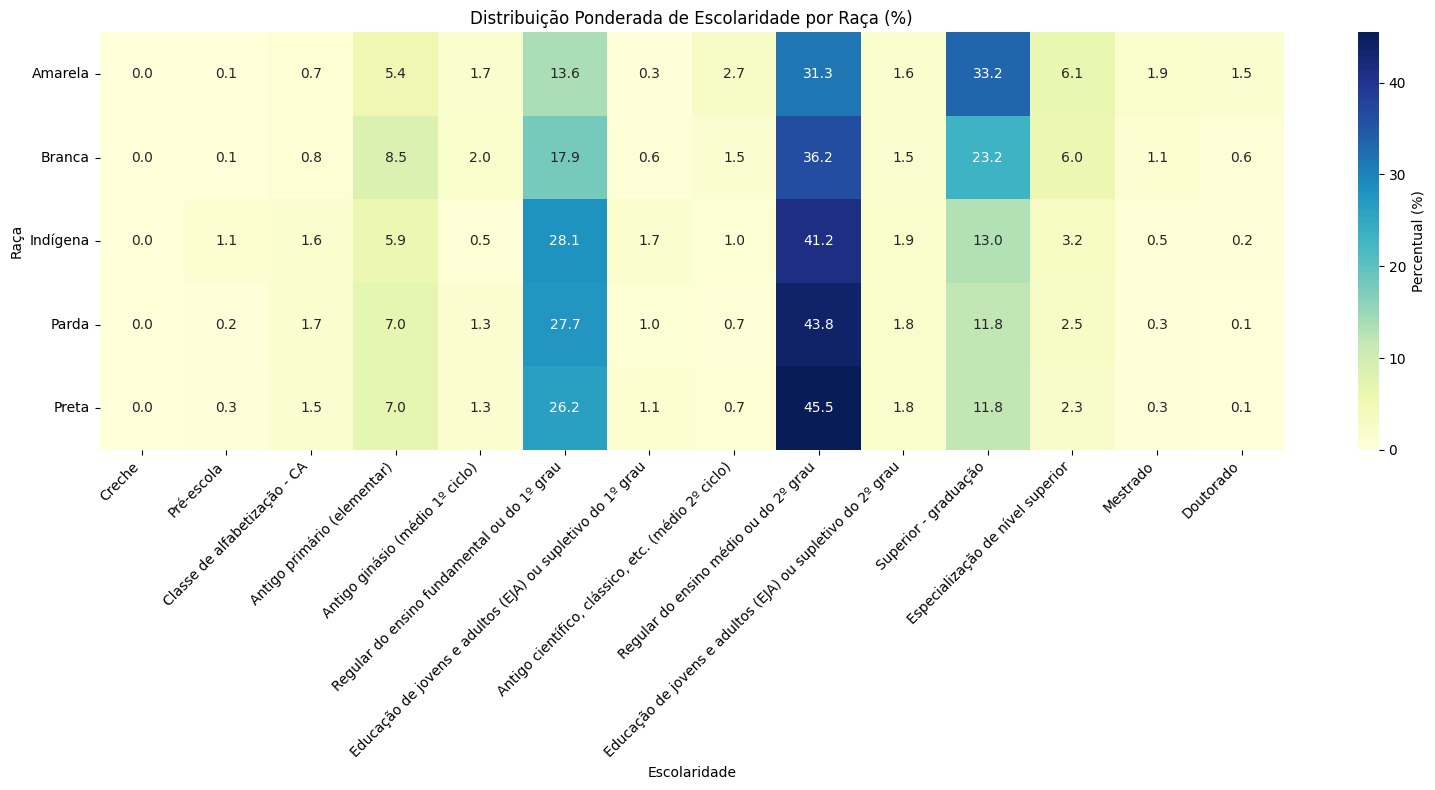

In [35]:
escola_order = [
    "Creche", "Pré-escola", "Classe de alfabetização - CA",
    "Antigo primário (elementar)", "Antigo ginásio (médio 1º ciclo)",
    "Regular do ensino fundamental ou do 1º grau", "Educação de jovens e adultos (EJA) ou supletivo do 1º grau",
    "Antigo científico, clássico, etc. (médio 2º ciclo)", "Regular do ensino médio ou do 2º grau",
    "Educação de jovens e adultos (EJA) ou supletivo do 2º grau", "Superior - graduação",
    "Especialização de nível superior", "Mestrado", "Doutorado"
]

pivot = df_escolaridade.pivot_table(
    index="V2010_cat",
    columns="V3009A_cat",
    values="V1032",
    aggfunc="sum",
    fill_value=0
)

pivot = pivot[escola_order]

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentual (%)'})
plt.title("Distribuição Ponderada de Escolaridade por Raça (%)")
plt.ylabel("Raça")
plt.xlabel("Escolaridade")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/figures/raca_escolaridade.png", dpi=300, bbox_inches='tight')
plt.show()


### Análise do Heatmap de Escolaridade por Raça

A análise do heatmap mostra padrões claros de desigualdade educacional entre raças:

- Os **Amarelos** foram os únicos cujo número de pessoas com **graduação** é superior ao número de pessoas com apenas **ensino médio** (33,2% > 31,3%).  
- Entre os **Brancos**, 23,2% alcançaram graduação, um valor consideravelmente maior que os 13,0% dos **Indígenas** e 11,8% tanto de **Pretos** quanto de **Pardos**.  
- O número de **Pretos, Pardos e Indígenas** com apenas **ensino fundamental** é superior a 25% (28,1%, 27,7% e 26,2% respectivamente), enquanto para **Brancos** e **Amarelos** esse valor é inferior a 20% (17,9% e 13,6% respectivamente).  
- A taxa de **pós-graduações** (especializações, mestrado e doutorado) é baixa em todas as raças, mas ainda segue o padrão de uma proporção maior de **Brancos** e **Amarelos** em relação a **Pretos, Indígenas e Pardos**.

### 3.3 Propriedade do Domicílio

Para esta análise, serão utilizadas as seguintes variáveis:

- **V2010** → identifica a **raça ou cor** do responsável pelo domicílio;  
- **V1032** → representa o **peso amostral**, utilizado para ponderar os resultados conforme o desenho da amostra;  
- **S01017** → indica a **condição de propriedade do domicílio**, conforme as categorias abaixo:

| Código | Condição do domicílio |
|:-------:|-----------------------|
| 1 | Próprio de algum morador – já pago |
| 2 | Próprio de algum morador – ainda pagando |
| 3 | Alugado |
| 4 | Cedido por empregador |
| 5 | Cedido por familiar |
| 6 | Cedido de outra forma |
| 7 | Outra condição |

Essas colunas serão consolidadas em um novo DataFrame contendo apenas as três variáveis de interesse: **raça**, **peso amostral** e **condição de propriedade**.

A partir desse conjunto de dados, será possível observar **como a posse da moradia varia entre os diferentes grupos raciais**, avaliando desigualdades na **propriedade, aluguel e cessão de moradias**.


In [36]:
raca_map = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
}

moradia_map = {
    1: "Próprio - já pago",
    2: "Próprio - pagando",
    3: "Alugado",
    4: "Cedido por empregador",
    5: "Cedido por familiar",
    6: "Cedido de outra forma",
    7: "Outra condição"
}

df_propriedade = df_raca_known[["V2010", "V1032", "S01017"]].copy()
df_propriedade["V2010_cat"] = df_propriedade["V2010"].map(raca_map)
df_propriedade["S01017_cat"] = df_propriedade["S01017"].map(moradia_map)
df_propriedade = df_propriedade.dropna(subset=["V2010_cat", "S01017_cat"])

df_propriedade.head()


,V2010,V1032,S01017,V2010_cat,S01017_cat
0,4,148.334313,1,Parda,Próprio - já pago
1,4,222.110627,3,Parda,Alugado
2,4,222.110627,3,Parda,Alugado
3,4,258.180088,1,Parda,Próprio - já pago
4,4,258.180088,1,Parda,Próprio - já pago


### Gráfico de Barras Empilhadas da Condição de Moradia por Raça

Para analisar as diferenças nas condições de moradia entre os grupos raciais, será gerado um **gráfico de barras empilhadas ponderado pelos pesos amostrais**.

- Cada barra representa uma **raça**, e cada segmento dentro da barra mostra o **percentual ponderado** de indivíduos em cada categoria de condição de moradia;  
- A ponderação é feita com base na variável **V1032 (peso amostral)**, garantindo que os resultados reflitam a estrutura populacional da pesquisa;  
- Essa visualização permite identificar **padrões de desigualdade habitacional**, como diferenças nas taxas de propriedade, aluguel e cessão entre raças;  
- É possível observar se determinados grupos estão mais concentrados em moradias próprias, alugadas ou cedidas, refletindo diferenças estruturais de acesso à habitação.

> O gráfico de barras empilhadas facilita a comparação direta entre os grupos raciais e evidencia as disparidades nas formas de posse do domicílio.


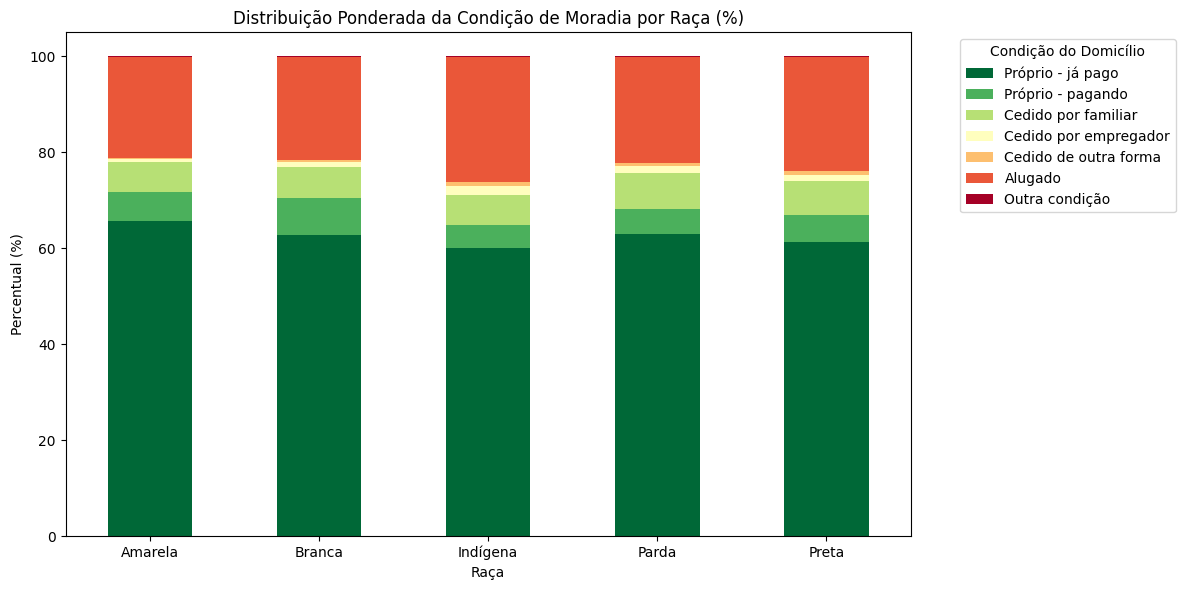

In [37]:
ordem_colunas = [
    "Próprio - já pago", "Próprio - pagando",
    "Cedido por familiar", "Cedido por empregador", "Cedido de outra forma",
    "Alugado", "Outra condição"
]

pivot = df_propriedade.pivot_table(
    index="V2010_cat",
    columns="S01017_cat",
    values="V1032",
    aggfunc="sum",
    fill_value=0
)

pivot = pivot[ordem_colunas]

pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap=plt.colormaps["RdYlGn_r"]
)

plt.title("Distribuição Ponderada da Condição de Moradia por Raça (%)")
plt.ylabel("Percentual (%)")
plt.xlabel("Raça")
plt.xticks(rotation=0)
plt.legend(title="Condição do Domicílio", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("../reports/figures/raca_propriedade.png", dpi=300, bbox_inches="tight")
plt.show()

In [38]:
def categoria_moradia(s):
    if s in ["Próprio - já pago", "Próprio - pagando"]:
        return "Próprio"
    elif s in ["Cedido por familiar", "Cedido por empregador", "Cedido de outra forma"]:
        return "Cedido"
    elif s == "Alugado":
        return "Alugado"
    else:
        return "Outra"

df_propriedade["moradia_grupo"] = df_propriedade["S01017_cat"].apply(categoria_moradia)

tabela_taxa = (
    df_propriedade
    .groupby(["V2010_cat", "moradia_grupo"])["V1032"]
    .sum()
    .unstack(fill_value=0)
)

tabela_taxa_pct = tabela_taxa.div(tabela_taxa.sum(axis=1), axis=0) * 100
tabela_taxa_pct = tabela_taxa_pct.round(1)

ordem_colunas = ["Próprio", "Cedido", "Alugado", "Outra"]
tabela_taxa_pct = tabela_taxa_pct[ordem_colunas]

tabela_taxa_pct


moradia_grupo,Próprio,Cedido,Alugado,Outra
V2010_cat,,,,
Amarela,71.6,7.2,21.0,0.2
Branca,70.4,7.9,21.4,0.2
Indígena,64.8,8.9,26.1,0.1
Parda,68.2,9.6,22.0,0.2
Preta,67.0,9.1,23.7,0.2


### Análise da distribuição da Condição de Moradia por Raça

Observa-se que, de forma geral, **não existem grandes diferenças** na condição de moradia entre os diferentes grupos raciais.  

Os percentuais de domicílios próprios (já pagos ou ainda pagando), alugados e cedidos são relativamente semelhantes para a maioria das raças, refletindo padrões semelhantes de posse habitacional.

Um destaque é o grupo **Indígena**, que apresenta uma **taxa de domicílios alugados mais alta**, ultrapassando **26%**, enquanto a proporção de domicílios próprios é cerca de **5% a 7% menor** do que nos grupos **Amarela** e **Branca**. Isso indica uma leve diferença no padrão de posse de imóveis para este grupo, mas, de modo geral, as disparidades não são tão significativas.


### 3.4 Tratamento de Esgoto

Para esta análise, serão utilizadas as seguintes variáveis:

- **V2010** → identifica a **raça ou cor** do responsável pelo domicílio;  
- **V1032** → representa o **peso amostral**, utilizado para ponderar os resultados conforme o desenho da amostra;  
- **S01012A** → indica o **destino do esgoto do banheiro ou buraco de dejeção**, conforme as categorias abaixo:

| Código | Destino do esgoto |
|:-------:|------------------|
| 1 | Rede geral, rede pluvial |
| 2 | Fossa séptica ligada à rede |
| 3 | Fossa séptica não ligada à rede |
| 4 | Fossa rudimentar |
| 5 | Vala |
| 6 | Rio, lago ou mar |
| 7 | Outra forma |
| - | Não aplicável |

Essas colunas serão consolidadas em um novo DataFrame contendo apenas as três variáveis de interesse: **raça**, **peso amostral** e **destino do esgoto**.

A partir desse conjunto de dados, será possível observar **como o acesso a sistemas de saneamento básico varia entre diferentes grupos raciais**, avaliando desigualdades no tratamento e destino do esgoto.


In [39]:
df_esgoto = df_raca_known[["V2010", "V1032", "S01012A"]].copy()

esgoto_map = {
    1: "Rede geral, rede pluvial",
    2: "Fossa séptica ligada à rede",
    3: "Fossa séptica não ligada à rede",
    4: "Fossa rudimentar",
    5: "Vala",
    6: "Rio, lago ou mar",
    7: "Outra forma",
    9: "Não aplicável"
}

df_esgoto["V2010_cat"] = df_esgoto["V2010"].map({
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
})

df_esgoto["S01012A_cat"] = df_esgoto["S01012A"].map(esgoto_map)
df_esgoto = df_esgoto[df_esgoto["S01012A_cat"] != "Não aplicável"]

df_esgoto.head()

,V2010,V1032,S01012A,V2010_cat,S01012A_cat
0,4,148.334313,4.0,Parda,Fossa rudimentar
1,4,222.110627,4.0,Parda,Fossa rudimentar
2,4,222.110627,4.0,Parda,Fossa rudimentar
3,4,258.180088,4.0,Parda,Fossa rudimentar
4,4,258.180088,4.0,Parda,Fossa rudimentar


### Gráfico de Barras Empilhadas do Destino do Esgoto por Raça

Para analisar as diferenças no destino do esgoto entre os grupos raciais, será gerado um **gráfico de barras empilhadas ponderado pelos pesos amostrais**.

- Cada barra representa uma **raça**, e cada segmento dentro da barra mostra o **percentual ponderado** de domicílios em cada categoria de destino do esgoto;  
- A ponderação é feita com base na variável **V1032 (peso amostral)**, garantindo que os resultados reflitam a estrutura populacional da pesquisa;  
- Essa visualização permite identificar **desigualdades no acesso a sistemas de saneamento básico**, como diferenças nas taxas de ligação à rede, fossas sépticas ou métodos rudimentares entre raças;  
- É possível observar se determinados grupos estão mais concentrados em domicílios com rede de esgoto, fossas ligadas ou formas inadequadas de descarte.

> O gráfico de barras empilhadas facilita a comparação direta entre os grupos raciais e evidencia as disparidades no tratamento de esgoto domiciliar.


<Figure size 1200x600 with 0 Axes>

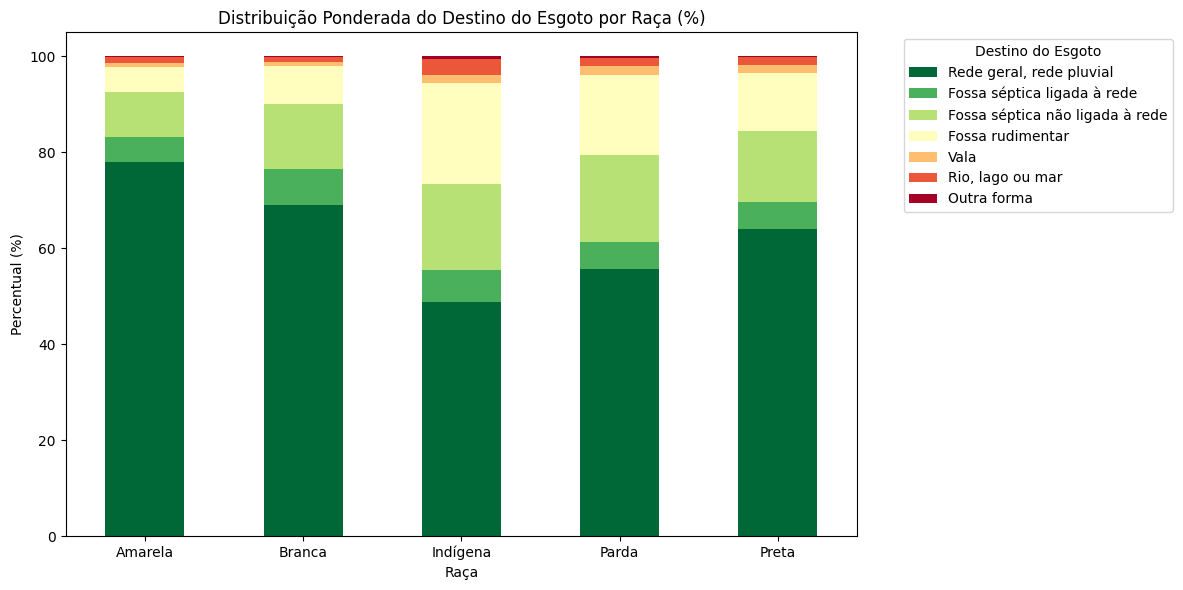

In [40]:
ordem_esgoto = [
    "Rede geral, rede pluvial",
    "Fossa séptica ligada à rede",
    "Fossa séptica não ligada à rede",
    "Fossa rudimentar",
    "Vala",
    "Rio, lago ou mar",
    "Outra forma"
]

pivot = df_esgoto.pivot_table(
    index="V2010_cat",
    columns="S01012A_cat",
    values="V1032",
    aggfunc="sum",
    fill_value=0
)

pivot = pivot[ordem_esgoto]
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap=plt.colormaps["RdYlGn_r"]
)

plt.title("Distribuição Ponderada do Destino do Esgoto por Raça (%)")
plt.ylabel("Percentual (%)")
plt.xlabel("Raça")
plt.xticks(rotation=0)
plt.legend(title="Destino do Esgoto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("../reports/figures/raca_esgoto.png", dpi=300, bbox_inches="tight")
plt.show()

In [41]:
def categoria_esgoto(s):
    if s in ["Rede geral, rede pluvial", "Fossa séptica ligada à rede"]:
        return "Adequado"
    elif s in ["Fossa séptica não ligada à rede", "Fossa rudimentar"]:
        return "Parcialmente adequado"
    elif s in ["Vala", "Rio, lago ou mar"]:
        return "Inadequado"
    else:
        return "Outra forma"

df_esgoto["esgoto_grupo"] = df_esgoto["S01012A_cat"].apply(categoria_esgoto)

tabela_esgoto = (
    df_esgoto
    .groupby(["V2010_cat", "esgoto_grupo"])["V1032"]
    .sum()
    .unstack(fill_value=0)
)

tabela_esgoto_pct = tabela_esgoto.div(tabela_esgoto.sum(axis=1), axis=0) * 100
tabela_esgoto_pct = tabela_esgoto_pct.round(1)

ordem_colunas = ["Adequado", "Parcialmente adequado", "Inadequado", "Outra forma"]
tabela_esgoto_pct = tabela_esgoto_pct[ordem_colunas]

tabela_esgoto_pct


esgoto_grupo,Adequado,Parcialmente adequado,Inadequado,Outra forma
V2010_cat,,,,
Amarela,83.0,14.4,2.2,0.4
Branca,76.4,21.5,1.8,0.3
Indígena,54.8,38.6,5.0,1.6
Parda,60.9,34.4,3.6,1.0
Preta,69.3,26.7,3.3,0.8


### Análise da distribuição da Adequação do Esgoto por Raça

Observa-se que existem **diferenças significativas** na adequação do esgoto entre os diferentes grupos raciais.  

Os grupos **Amarela** e **Branca** apresentam os maiores percentuais de domicílios com esgoto **adequado**, com **83%** e **76,4%**, respectivamente. Além disso, apresentam as menores proporções de domicílios com esgoto **inadequado**.  

Por outro lado, os grupos **Indígena** e **Parda** apresentam **percentuais mais baixos de adequação**, com apenas **54,8%** e **60,9%** de domicílios com esgoto adequado, e percentuais mais altos de esgoto **parcialmente adequado** (**38,6%** e **34,4%**, respectivamente). O grupo **Indígena** também se destaca por ter o maior percentual de esgoto classificado como **inadequado** (**5%**)), indicando maior vulnerabilidade nesse aspecto da infraestrutura.  

O grupo **Preta** situa-se entre os extremos, com **69,3%** de esgoto adequado, mostrando disparidades intermediárias em relação aos demais grupos.  

> Esses dados indicam que **as desigualdades raciais refletem-se também nas condições de infraestrutura básica**, com grupos historicamente marginalizados apresentando maiores dificuldades de acesso a esgoto adequado.


### 3.5 Dependência de Auxílios Sociais

Para esta análise, serão utilizadas quatro variáveis principais:

- **V2010** → identifica a **raça ou cor** do indivíduo;  
- **V1032** → representa o **peso amostral**, necessário para ponderar os resultados conforme o desenho da amostra;  
- **V5001A** → indica se o indivíduo recebeu **Benefício Assistencial de Prestação Continuada (BPC-LOAS)** no mês de referência;  
- **V5002A** → indica se o indivíduo recebeu **Programa Auxílio Brasil (antigo Bolsa Família)** no mês de referência;  
- **V5003A** → indica se o indivíduo recebeu **outros programas sociais do governo** no mês de referência.

Cada variável de benefício possui as seguintes categorias:

| Código | Situação |
|--------|----------|
| 1      | Sim |
| 2      | Não |

Vamos considerar apenas indivíduos com **informações válidas** para esses programas (não nulos ou “Não aplicável”), criando um DataFrame contendo **raça**, **peso amostral** e a **informação sobre cada tipo de auxílio recebido**.  

Para simplificar a análise, será gerada **uma única variável binária**, chamada **Qualquer_auxilio**, que indica se o indivíduo recebe pelo menos um tipo de auxílio (**Sim**) ou nenhum (**Não**).  

Essa consolidação permitirá analisar a **dependência de auxílios sociais entre diferentes grupos raciais**, considerando a ponderação pelos pesos amostrais para refletir corretamente a população.


In [42]:
df_auxilios = df_raca_known[["V2010", "V1032", "V5001A", "V5002A", "V5003A"]].copy()

auxilios_map = {
    1: "Sim",
    2: "Não"
}

df_auxilios["V2010_cat"] = df_auxilios["V2010"].map({
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena"
})

df_auxilios["BPC_LOAS"] = df_auxilios["V5001A"].map(auxilios_map)
df_auxilios["Auxilio_Brasil"] = df_auxilios["V5002A"].map(auxilios_map)
df_auxilios["Outros_programas"] = df_auxilios["V5003A"].map(auxilios_map)

df_auxilios = df_auxilios[["V2010_cat", "V1032", "BPC_LOAS", "Auxilio_Brasil", "Outros_programas"]]

df_auxilios["Qualquer_auxilio"] = df_auxilios[["BPC_LOAS", "Auxilio_Brasil", "Outros_programas"]].apply(
    lambda x: "Sim" if "Sim" in x.values else "Não", axis=1
)

df_auxilios = df_auxilios[["V2010_cat", "Qualquer_auxilio", "V1032"]]

df_auxilios.head()


,V2010_cat,Qualquer_auxilio,V1032
0,Parda,Não,148.334313
1,Parda,Não,222.110627
2,Parda,Não,222.110627
3,Parda,Não,258.180088
4,Parda,Não,258.180088


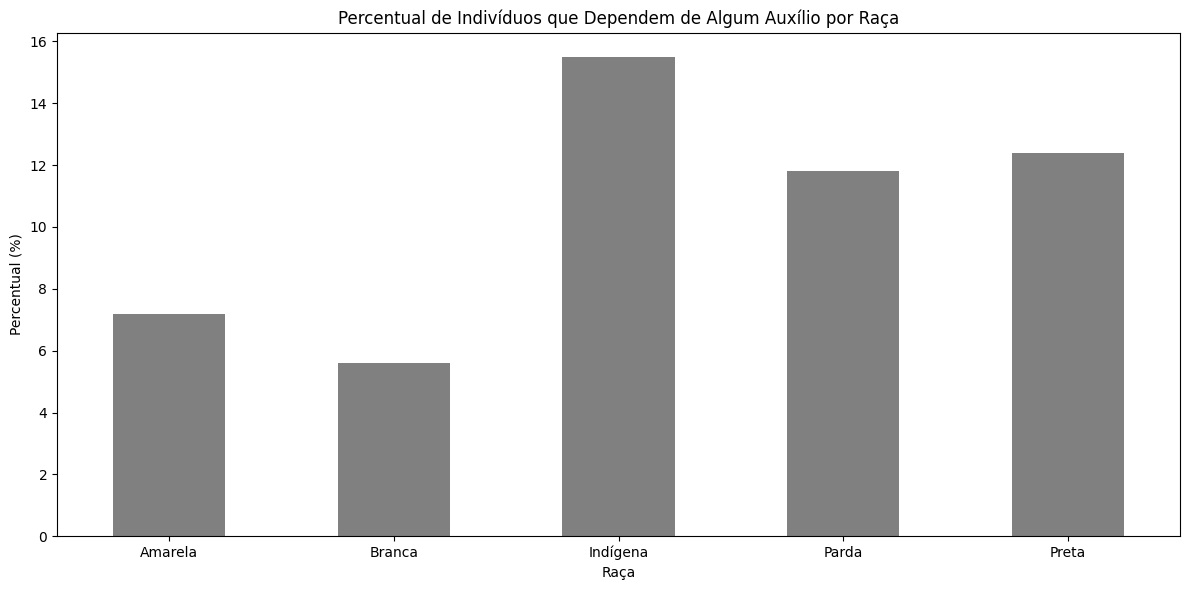

In [43]:
tabela_auxilio = (
    df_auxilios
    .groupby(["V2010_cat", "Qualquer_auxilio"])["V1032"]
    .sum()
    .unstack(fill_value=0)
)

tabela_auxilio_pct = tabela_auxilio.div(tabela_auxilio.sum(axis=1), axis=0) * 100
tabela_auxilio_pct = tabela_auxilio_pct.round(1)

tabela_auxilio_pct["Sim"].plot(
    kind="bar",
    figsize=(12, 6),
    color="#808080"  
)

plt.title("Percentual de Indivíduos que Dependem de Algum Auxílio por Raça")
plt.ylabel("Percentual (%)")
plt.xlabel("Raça")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/figures/raca_qualquer_auxilio.png", dpi=300, bbox_inches="tight")
plt.show()


### Análise da Dependência de Auxílios Sociais por Raça

Observa-se que existem **diferenças notáveis** na dependência de auxílios sociais entre os diferentes grupos raciais.  

O grupo **Indígena** apresenta a maior proporção de indivíduos que dependem de algum tipo de auxílio, com aproximadamente **15%**, seguido pelos grupos **Preta** e **Parda**, ambos com cerca de **12%**.  

Em contraste, os grupos **Amarela** e **Branca** apresentam os menores percentuais de dependência, aproximadamente **7%** e **5%**, respectivamente.  

> Esses resultados evidenciam que a **dependência de auxílios sociais não é uniforme entre as raças**, refletindo diferenças socioeconômicas e de acesso a recursos, com grupos historicamente marginalizados apresentando maior vulnerabilidade.


## 4. Conclusões

A análise exploratória de dados por raça permitiu identificar padrões e desigualdades em diferentes dimensões socioeconômicas e habitacionais.  

Principais achados:

- **Rendimento**: os grupos **Parda** e **Preta** apresentam rendimentos significativamente mais baixos que os **Brancos** e **Amarelos**, com medianas próximas às dos **Indígenas**.  
- **Escolaridade**: os grupos **Brancos** e **Amarelos** possuem maior proporção de indivíduos com graduação e pós-graduação, enquanto **Pretos, Pardos** e **Indígenas** estão mais concentrados em níveis fundamentais e médios.  
- **Propriedade de domicílio**: não há grandes diferenças entre raças, embora **Indígenas** apresentem maior taxa de domicílios alugados e menor proporção de domicílios próprios.  
- **Condições de esgoto**: há desigualdade clara, com **Amarelos** e **Brancos** apresentando maiores percentuais de adequação, enquanto **Indígenas, Pardos** e **Pretos** enfrentam maiores dificuldades.  
- **Dependência de auxílios sociais**: **Indígenas** e **Pretos/Pardos** apresentam maior percentual de indivíduos que dependem de algum tipo de auxílio em comparação a **Brancos** e **Amarelos**.

> Esses resultados evidenciam que **desigualdades raciais persistem em múltiplas dimensões**, refletindo diferenças históricas e estruturais de acesso a recursos, educação, habitação e infraestrutura básica.  
> Assim, **são necessários estudos adicionais e políticas públicas direcionadas** para reduzir essas disparidades, promovendo maior equidade e inclusão social entre os diferentes grupos raciais.

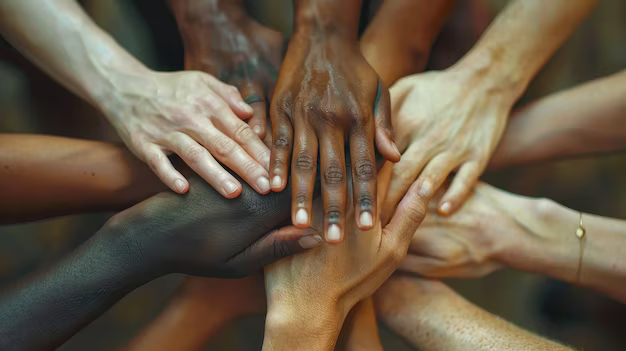